#### merge urls to recipe dataframe

In [41]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import ast
import re
import math

In [2]:
# recipes dataframes
# there is a mismatch in df3_urls and df3_recipes 2430 vs 1022
df1 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df1.csv')
df2 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df2.csv')
df3 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df3.csv')
df4 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df4.csv')
df5 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df5.csv')
df6 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df6.csv')
df7 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df7.csv')
df8 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df8.csv')

In [3]:
# concat the dataframes
df_recipes = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df_recipes = df_recipes.drop(['Unnamed: 0','id'], axis=1) #drop columns not required

/Users/Mona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
df_recipes=df_recipes.reset_index(drop='index')

In [5]:
# url dataframes
df1_url = pd.read_csv('../ScrapeData/csv_urls/urls_df1.csv')
df2_url = pd.read_csv('../ScrapeData/csv_urls/urls_df2.csv')
df3_url = pd.read_csv('../ScrapeData/csv_urls/urls_df3.csv')
df3_url = df3_url.iloc[:1022,:]
df4_url = pd.read_csv('../ScrapeData/csv_urls/urls_df4.csv')
df5_url = pd.read_csv('../ScrapeData/csv_urls/urls_df5.csv')
df6_url = pd.read_csv('../ScrapeData/csv_urls/urls_df6.csv')

In [6]:
# concat the dataframes url and recipes
df_url = pd.concat([df1_url,df2_url, df3_url, df4_url,df5_url,df6_url])
df_url = df_url.drop(['Unnamed: 0'], axis=1) #drop columns not required

In [7]:
df_url = df_url.reset_index(drop='index')

In [8]:
# merge df_url and df_recipes
df = pd.concat([df_url,df_recipes],axis=1)

In [9]:
df = df.reset_index(drop='index')

In [10]:
df.tail()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title
11519,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['1 medium white onion, quartered', '3 lb ripe...",94%,Preheat oven to 400°F.Arrange 2 onion quarters...,3.0,16.0,"['Mexican', 'Condiment/Spread', 'Food Processo...",Salsa Ranchera
11520,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['2 cups sugar', '1 cup canola oil', '4 large ...",93%,Position rack in center of oven and preheat to...,4.0,107.0,"['American', 'Cake', 'Mixer', 'Ginger', 'Desse...",Old-Fashioned Carrot Cake with Maple-cream Che...
11521,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/560ea103f...,"['1 cup soy sauce', '1/2 cupmirin (sweet Japan...",90%,Combine first 7 ingredients in medium bowl; wh...,3.5,66.0,"['Asian', 'Beef', 'Beef Rib', 'Summer', 'Grill...",Grilled Korean-Style Short Ribs
11522,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/560ea7ebf...,['4 cups frozen sliced peaches (about 13/4 pou...,71%,"Preheat oven to 375°F. Combine peaches, sugar,...",2.5,17.0,"['American', 'Fruit', 'Dessert', 'Bake', 'Peac...",Peaches with Shortcake Topping
11523,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['1/4 cup olive oil', '2 cups chopped onions',...",89%,Heat olive oil in heavy large skillet over med...,3.0,27.0,"['Cheese', 'Pasta', 'Tomato', 'Sauté', 'Vegeta...","Pasta with Tomatoes, Artichokes, and Feta Cheese"


#### preprocess the dataframe

In [11]:
df['makeitagainscore'] = pd.to_numeric(df['makeitagainscore'].str.replace('%', ''))

In [12]:
# drop rows if there are null value records
df = df.dropna(axis=0, how='any',subset=['bestrating','ingredients',\
                            'makeitagainscore','preparation','rating','reviews','tags','title'])

In [13]:
df = df.reset_index(drop='index')

In [14]:
df.tail()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title
11489,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['1 medium white onion, quartered', '3 lb ripe...",94.0,Preheat oven to 400°F.Arrange 2 onion quarters...,3.0,16.0,"['Mexican', 'Condiment/Spread', 'Food Processo...",Salsa Ranchera
11490,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['2 cups sugar', '1 cup canola oil', '4 large ...",93.0,Position rack in center of oven and preheat to...,4.0,107.0,"['American', 'Cake', 'Mixer', 'Ginger', 'Desse...",Old-Fashioned Carrot Cake with Maple-cream Che...
11491,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/560ea103f...,"['1 cup soy sauce', '1/2 cupmirin (sweet Japan...",90.0,Combine first 7 ingredients in medium bowl; wh...,3.5,66.0,"['Asian', 'Beef', 'Beef Rib', 'Summer', 'Grill...",Grilled Korean-Style Short Ribs
11492,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/560ea7ebf...,['4 cups frozen sliced peaches (about 13/4 pou...,71.0,"Preheat oven to 375°F. Combine peaches, sugar,...",2.5,17.0,"['American', 'Fruit', 'Dessert', 'Bake', 'Peac...",Peaches with Shortcake Topping
11493,1000-1499,https://www.epicurious.com/recipes/food/views/...,4.0,NaN,"['1/4 cup olive oil', '2 cups chopped onions',...",89.0,Heat olive oil in heavy large skillet over med...,3.0,27.0,"['Cheese', 'Pasta', 'Tomato', 'Sauté', 'Vegeta...","Pasta with Tomatoes, Artichokes, and Feta Cheese"


In [15]:
df["ingredients_refined"] = ""
for index, row in df.iterrows():
    ingredients_items = ast.literal_eval(row["ingredients"])
    df.set_value(index,'ingredients_refined',ingredients_items)

/Users/Mona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [16]:
df["tags_refined"] = ""
for index, row in df.iterrows():
    tag_items = ast.literal_eval(row["tags"])
    df.set_value(index,'tags_refined',tag_items)

/Users/Mona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


#### extract ingrediants

In [17]:
prepositions = ["A", "An", "a", "about", "above", "above", "across", "additional","after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "plus", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thickly", "thin", "thinly", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

In [18]:
# Common measurement words and hard-coded words.
measurement_words = ['pound',
 'cubes',"Fresh",
  'cups',
  'cut',
 'kilogram',
 'ounce','-ounce','ounces',
 'gram','large',
 'cup','ground',
 'spoon','trimmed',
 'quart',
 'teaspoon','teaspoons',
 'smidgen','chopped',
 'drop','medium', 'small',
 'gallon',
 'dash',
 'handful',
 'scoop',
 'bowl',
 'inch',
 '-inch','freshly', 'bunch',
 'pinch','finely',
 'liter',
 'milliliter',
 'tablespoon', 'tablespoons',
 'fluid',
 'bottle','stems', 'removed',
 'tad','Instant',
 'pint', 'Tbsp', 'tsp','lb', '-oz', 'oz','sliced','diced','Pot', 'pot','-','-pound']

In [19]:
# create a list of stopwords, prepositions, and measurement words
#pip install --user -U nltk
filtered = nltk.corpus.stopwords.words('english')
for word in prepositions:
    filtered.append(word)
for word in measurement_words:
    filtered.append(word)

In [20]:
df["ingredient_list"] = ""
for index, row in df.iterrows():
    ingredients_items = ast.literal_eval(row["ingredients"])

    ingredients = []
    pattern = "([^\d\\.\\,\\\;\\*\\]\\[\\%\\½\\<\\>\\:\\°\\?\\�\\}\\{\)\(\"\/\s]+)"
    for ingredient in ingredients_items:
        p = re.compile(pattern)
        result = p.findall(ingredient) 
        ingredients.append(result)
        
        
    single_ingr = sum(ingredients, [])
    recipe_ingr = list(set(single_ingr))


    filtered_ingr = []
    for item in recipe_ingr:
        if item not in filtered:
            filtered_ingr.append(item)
    df.set_value(index,"ingredient_list",filtered_ingr)

/Users/Mona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [21]:
df["ingredients_string"] = df["ingredient_list"].map(lambda x: ",".join(x))

In [22]:
df.head()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,ingredients_refined,tags_refined,ingredient_list,ingredients_string
0,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90.0,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"[2 cups whole-wheat flour, 2 cups all-purpose ...","[Irish, Bread, Bake, Vegetarian, Quick & Easy,...","[soda, buttermilk, sugar, butter, germ, salt, ...","soda,buttermilk,sugar,butter,germ,salt,tartar,..."
1,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91.0,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"[1 Tbsp. crushed red pepper flakes, 1 Tbsp. wh...","[Pepper, Fennel, Pork, Garlic, White Wine, Oni...","[bay, garlic, canned, cap, fat, halved, head, ...","bay,garlic,canned,cap,fat,halved,head,red,-thi..."
2,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a68f33b3...,"['1/4 cup extra-virgin olive oil', '12 oz. dry...",67.0,Pour oil into cooker insert and select “Sauté....,2.0,15.0,"['Instant Pot', 'Kale', 'Potato', 'Onion', 'Ga...",Instant Pot Caldo Verde,"[1/4 cup extra-virgin olive oil, 12 oz. dry-cu...","[Instant Pot, Kale, Potato, Onion, Garlic, Sou...","[bay, curly, garlic, olive, potatoes, chorizo,...","bay,curly,garlic,olive,potatoes,chorizo,Spanis..."
3,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a9971b01...,"['1 tablespoon olive oil', '2 garlic cloves, t...",81.0,Preheat oven to 350°F. Heat oil in a large ski...,3.5,26.0,"['Side', 'Bake', 'Christmas', 'Easter', 'Thank...",Parmesan Bread Pudding with Broccoli Rabe and ...,"[1 tablespoon olive oil, 2 garlic cloves, thin...","[Side, Bake, Christmas, Easter, Thanksgiving, ...","[slices, garlic, red, olive, flakes, pepper, e...","slices,garlic,red,olive,flakes,pepper,eggs,sal..."
4,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/54b71d9a2...,"['1 1/2 pounds boneless, skinless chicken brea...",96.0,"Place chicken, garlic, bay leaves, allspice, a...",3.5,23.0,"['Asian', 'Soup/Stew', 'Chicken', 'Low Carb', ...",Brothy Poached Chicken with Mushrooms and Fres...,"[1 1/2 pounds boneless, skinless chicken breas...","[Asian, Soup/Stew, Chicken, Low Carb, Low Fat,...","[bay, sauce, scallions, allspice, garlic, halv...","bay,sauce,scallions,allspice,garlic,halved,hea..."


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [24]:
vect = TfidfVectorizer(stop_words='english')
X = vect.fit_transform(df['ingredients_string'])

In [25]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
df['cluster'] = model.labels_

In [27]:
df.head()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,ingredients_refined,tags_refined,ingredient_list,ingredients_string,cluster
0,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90.0,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"[2 cups whole-wheat flour, 2 cups all-purpose ...","[Irish, Bread, Bake, Vegetarian, Quick & Easy,...","[soda, buttermilk, sugar, butter, germ, salt, ...","soda,buttermilk,sugar,butter,germ,salt,tartar,...",4
1,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91.0,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"[1 Tbsp. crushed red pepper flakes, 1 Tbsp. wh...","[Pepper, Fennel, Pork, Garlic, White Wine, Oni...","[bay, garlic, canned, cap, fat, halved, head, ...","bay,garlic,canned,cap,fat,halved,head,red,-thi...",1
2,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a68f33b3...,"['1/4 cup extra-virgin olive oil', '12 oz. dry...",67.0,Pour oil into cooker insert and select “Sauté....,2.0,15.0,"['Instant Pot', 'Kale', 'Potato', 'Onion', 'Ga...",Instant Pot Caldo Verde,"[1/4 cup extra-virgin olive oil, 12 oz. dry-cu...","[Instant Pot, Kale, Potato, Onion, Garlic, Sou...","[bay, curly, garlic, olive, potatoes, chorizo,...","bay,curly,garlic,olive,potatoes,chorizo,Spanis...",1
3,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a9971b01...,"['1 tablespoon olive oil', '2 garlic cloves, t...",81.0,Preheat oven to 350°F. Heat oil in a large ski...,3.5,26.0,"['Side', 'Bake', 'Christmas', 'Easter', 'Thank...",Parmesan Bread Pudding with Broccoli Rabe and ...,"[1 tablespoon olive oil, 2 garlic cloves, thin...","[Side, Bake, Christmas, Easter, Thanksgiving, ...","[slices, garlic, red, olive, flakes, pepper, e...","slices,garlic,red,olive,flakes,pepper,eggs,sal...",1
4,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/54b71d9a2...,"['1 1/2 pounds boneless, skinless chicken brea...",96.0,"Place chicken, garlic, bay leaves, allspice, a...",3.5,23.0,"['Asian', 'Soup/Stew', 'Chicken', 'Low Carb', ...",Brothy Poached Chicken with Mushrooms and Fres...,"[1 1/2 pounds boneless, skinless chicken breas...","[Asian, Soup/Stew, Chicken, Low Carb, Low Fat,...","[bay, sauce, scallions, allspice, garlic, halv...","bay,sauce,scallions,allspice,garlic,halved,hea...",0


In [28]:
df.groupby('cluster').count()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,ingredients_refined,tags_refined,ingredient_list,ingredients_string
cluster,,,,,,,,,,,,,,,
0,809,809,809,401,809,809,809,809,809,809,809,809,809,809,809
1,2275,2275,2275,1214,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
2,1456,1456,1456,583,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456
3,2698,2698,2698,1358,2698,2698,2698,2698,2698,2698,2698,2698,2698,2698,2698
4,1820,1820,1820,903,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820
5,2436,2436,2436,1185,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436


In [29]:
from collections import Counter

In [30]:
cluster = df[df['cluster']==0]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Asian', 427),
 ('Tree Nut Free', 372),
 ('Bon Appétit', 363),
 ('Dairy Free', 352),
 ('Quick & Easy', 325),
 ('Peanut Free', 322),
 ('Gourmet', 306),
 ('Ginger', 261),
 ('Dinner', 251),
 ('Pescatarian', 215),
 ('Kosher', 191),
 ('Healthy', 171),
 ('Vegetarian', 162),
 ('Summer', 160),
 ('Chicken', 155),
 ('Sugar Conscious', 155),
 ('Soy Sauce', 142),
 ('No Sugar Added', 139),
 ('Stir-Fry', 122),
 ('Side', 121)]

In [31]:
cluster = df[df['cluster']==1]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Peanut Free', 1268),
 ('Soy Free', 1254),
 ('Bon Appétit', 1181),
 ('Tree Nut Free', 1080),
 ('Vegetarian', 989),
 ('Quick & Easy', 971),
 ('Pescatarian', 919),
 ('Kosher', 911),
 ('Wheat/Gluten-Free', 811),
 ('Gourmet', 751),
 ('No Sugar Added', 750),
 ('Tomato', 692),
 ('Dinner', 677),
 ('Dairy Free', 583),
 ('Side', 571),
 ('Healthy', 556),
 ('Summer', 556),
 ('Sugar Conscious', 518),
 ('Italian', 466),
 ('Pasta', 411)]

In [32]:
cluster = df[df['cluster']==2]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Bon Appétit', 956),
 ('Peanut Free', 658),
 ('Soy Free', 656),
 ('Tree Nut Free', 601),
 ('Winter', 430),
 ('Wheat/Gluten-Free', 428),
 ('Dinner', 417),
 ('Quick & Easy', 407),
 ('Soup/Stew', 397),
 ('Fall', 370),
 ('Sauté', 352),
 ('Gourmet', 352),
 ('Chicken', 350),
 ('No Sugar Added', 307),
 ('Onion', 287),
 ('American', 278),
 ('Side', 251),
 ('Vegetable', 245),
 ('Kosher', 210),
 ('Herb', 206)]

In [33]:
cluster = df[df['cluster']==3]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Peanut Free', 1575),
 ('Soy Free', 1571),
 ('Vegetarian', 1404),
 ('Tree Nut Free', 1321),
 ('Pescatarian', 1308),
 ('Kosher', 1279),
 ('Bon Appétit', 1179),
 ('Gourmet', 1039),
 ('Bake', 1018),
 ('Wheat/Gluten-Free', 888),
 ('Dessert', 818),
 ('Quick & Easy', 785),
 ('Side', 574),
 ('Kidney Friendly', 572),
 ('Fall', 568),
 ('American', 515),
 ('Milk/Cream', 499),
 ('No Sugar Added', 491),
 ('Winter', 475),
 ('Summer', 433)]

In [34]:
cluster = df[df['cluster']==4]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Bake', 1498),
 ('Dessert', 1461),
 ('Soy Free', 1363),
 ('Vegetarian', 1339),
 ('Peanut Free', 1321),
 ('Pescatarian', 1320),
 ('Kosher', 1319),
 ('Bon Appétit', 996),
 ('Kidney Friendly', 914),
 ('Tree Nut Free', 892),
 ('Chocolate', 604),
 ('Gourmet', 554),
 ('Cake', 533),
 ('Kid-Friendly', 522),
 ('American', 442),
 ('Egg', 409),
 ('Mixer', 389),
 ('Fall', 321),
 ('Milk/Cream', 313),
 ('Cookies', 293)]

In [35]:
cluster = df[df['cluster']==5]
tags = []
for index, row in cluster.iterrows():
    for items in row['tags_refined']:
        tags.append(items)
d = dict(Counter(tags).most_common(20))
sorted(d.items(), key=lambda x: x[1],reverse=True)

[('Bon Appétit', 1119),
 ('Peanut Free', 1071),
 ('Soy Free', 1060),
 ('Tree Nut Free', 975),
 ('Quick & Easy', 937),
 ('Gourmet', 816),
 ('Wheat/Gluten-Free', 809),
 ('Vegetarian', 677),
 ('Dinner', 654),
 ('Kosher', 625),
 ('Dairy Free', 619),
 ('Summer', 610),
 ('Pescatarian', 597),
 ('No Sugar Added', 556),
 ('Sugar Conscious', 449),
 ('American', 447),
 ('Healthy', 434),
 ('Side', 417),
 ('Onion', 406),
 ('Winter', 348)]

In [36]:
from sklearn.decomposition import TruncatedSVD
#Dimensionality reduction using truncated SVD (aka LSA).
#This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). 
svd = TruncatedSVD(n_components=2, n_iter=10, random_state=42)
svd.fit_transform(X)

array([[ 0.17595476,  0.24212955],
       [ 0.29935145, -0.19057365],
       [ 0.21363041, -0.1409355 ],
       ...,
       [ 0.2106732 , -0.07116894],
       [ 0.36513859,  0.43268839],
       [ 0.2767419 , -0.16664125]])

In [37]:
#Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation 
#which converts a set of correlated variables to a set of uncorrelated variables. 
#PCA is a most widely used tool in exploratory data analysis and in machine learning for predictive models. 
#Moreover, PCA is an unsupervised statistical technique used to examine the interrelations among a set of variables. 
#It is also known as a general factor analysis where regression determines a line of best fit.
pca = svd.fit_transform(X)

In [38]:
df['pca1'] = np.nan
df['pca2'] = np.nan

for index, row in df.iterrows():
    df.set_value(index, 'pca1', pca[index, 0])
    df.set_value(index, 'pca2', pca[index, 1])

/Users/Mona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Users/Mona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [39]:
df.head()

,batch,urls,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,ingredients_refined,tags_refined,ingredient_list,ingredients_string,cluster,pca1,pca2
0,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90.0,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"[2 cups whole-wheat flour, 2 cups all-purpose ...","[Irish, Bread, Bake, Vegetarian, Quick & Easy,...","[soda, buttermilk, sugar, butter, germ, salt, ...","soda,buttermilk,sugar,butter,germ,salt,tartar,...",4,0.175955,0.242130
1,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91.0,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"[1 Tbsp. crushed red pepper flakes, 1 Tbsp. wh...","[Pepper, Fennel, Pork, Garlic, White Wine, Oni...","[bay, garlic, canned, cap, fat, halved, head, ...","bay,garlic,canned,cap,fat,halved,head,red,-thi...",1,0.299351,-0.190574
2,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a68f33b3...,"['1/4 cup extra-virgin olive oil', '12 oz. dry...",67.0,Pour oil into cooker insert and select “Sauté....,2.0,15.0,"['Instant Pot', 'Kale', 'Potato', 'Onion', 'Ga...",Instant Pot Caldo Verde,"[1/4 cup extra-virgin olive oil, 12 oz. dry-cu...","[Instant Pot, Kale, Potato, Onion, Garlic, Sou...","[bay, curly, garlic, olive, potatoes, chorizo,...","bay,curly,garlic,olive,potatoes,chorizo,Spanis...",1,0.213630,-0.140935
3,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/5a9971b01...,"['1 tablespoon olive oil', '2 garlic cloves, t...",81.0,Preheat oven to 350°F. Heat oil in a large ski...,3.5,26.0,"['Side', 'Bake', 'Christmas', 'Easter', 'Thank...",Parmesan Bread Pudding with Broccoli Rabe and ...,"[1 tablespoon olive oil, 2 garlic cloves, thin...","[Side, Bake, Christmas, Easter, Thanksgiving, ...","[slices, garlic, red, olive, flakes, pepper, e...","slices,garlic,red,olive,flakes,pepper,eggs,sal...",1,0.278714,-0.106009
4,0-249,https://www.epicurious.com/recipes/food/views/...,4.0,https://assets.epicurious.com/photos/54b71d9a2...,"['1 1/2 pounds boneless, skinless chicken brea...",96.0,"Place chicken, garlic, bay leaves, allspice, a...",3.5,23.0,"['Asian', 'Soup/Stew', 'Chicken', 'Low Carb', ...",Brothy Poached Chicken with Mushrooms and Fres...,"[1 1/2 pounds boneless, skinless chicken breas...","[Asian, Soup/Stew, Chicken, Low Carb, Low Fat,...","[bay, sauce, scallions, allspice, garlic, halv...","bay,sauce,scallions,allspice,garlic,halved,hea...",0,0.268379,-0.156199


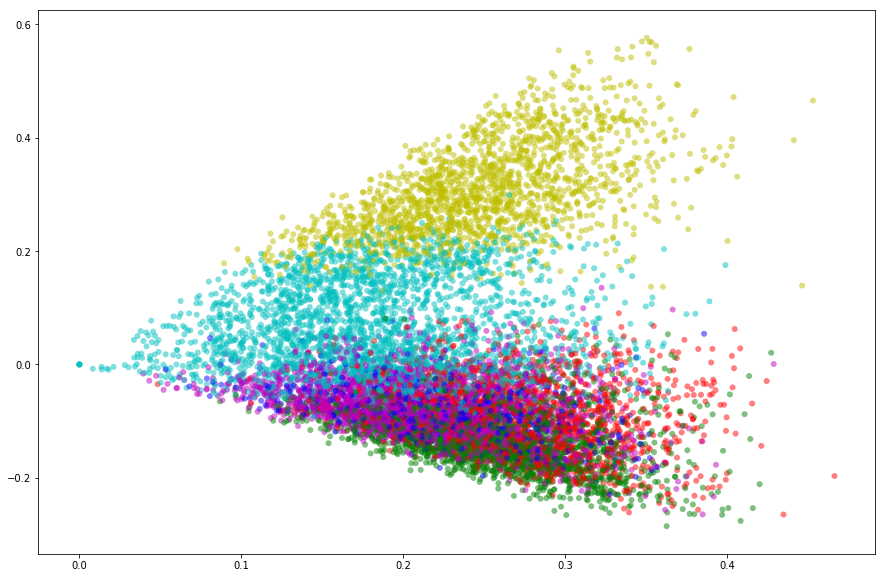

In [42]:
plt.figure(figsize=(15,10))
for index,row in df.iterrows():
    if row['cluster'] == 0:
        plt.scatter(row['pca1'], row['pca2'], c='b', marker="o",alpha=0.5, edgecolors='none',label='0')
    elif row['cluster'] == 1:
        plt.scatter(row['pca1'], row['pca2'], c='g', marker="o",alpha=0.5, edgecolors='none',label='1')
    elif row['cluster'] == 2:
        plt.scatter(row['pca1'], row['pca2'], c='r', marker="o",alpha=0.5, edgecolors='none',label='2')
    elif row['cluster'] == 3:
        plt.scatter(row['pca1'], row['pca2'], c='c', marker="o",alpha=0.5, edgecolors='none',label='3')
    elif row['cluster'] == 4:
        plt.scatter(row['pca1'], row['pca2'], c='y', marker="o",alpha=0.5, edgecolors='none',label='4')
    else:
        plt.scatter(row['pca1'], row['pca2'], c='m', marker="o",alpha=0.5, edgecolors='none',label='5')
plt.savefig('clusters.png')
plt.show()